# Zomato Operation Analysis

## ***DATA PREPROCESSING***

#### IMPORTING LIBRARIES

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### LOADING THE DATASET

In [4]:

dataset=pd.read_csv(r"F:\Datasets\New dataset\Zomato Dataset.csv")


#### OVERVIEW OF THE DATASET

In [5]:

dataset


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [6]:

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

#### STATISTICAL OVERVIEW 

In [7]:

dataset.describe()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


#### CHECKING FOR NULL VALUES

In [8]:

dataset.isnull().sum()


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:

print("There are null values across multiple columns such as age, ratings,time, etc.")


There are null values across multiple columns such as age, ratings,time, etc.


#### DROPPING THE NULL VALUES

In [10]:

df=dataset.dropna()
print(df.isnull().sum())

# Since NULL values are in a very small ratio compared to the total length, dropping them wont make any impact.


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64


#### CHEICKING FOR DUPLICATES

In [11]:

print("Number of Duplicates :",df.duplicated().sum())

# There is no duplicates exits in the dataset.


Number of Duplicates : 0


#### RENAMING and Standardizing the Column Names

In [32]:

df=df.rename(columns={"ID":"order_id"})

df=df.rename(columns={"time_taken (min)":"time_taken"})

df.columns=df.columns.str.lower() # all col are converted into lowercase


#### OUTLIER DETECTION

In [13]:

#Removing geospatial outliers

df=df[(df["restaurant_latitude"]>=-90) & (df["restaurant_latitude"]<=90)]
df=df[(df["restaurant_longitude"]>=-180) & (df["restaurant_longitude"]<=180)]

df=df[(df["delivery_location_latitude"]>=-90) & (df["delivery_location_latitude"]<=90)]
df=df[(df["delivery_location_longitude"]>=-180) & (df["delivery_location_longitude"]<=180)]

#Removing Time-based errors

df=df[df["time_order_picked"]>df["time_orderd"]]


#### CONVERTING THE DATA TYPES OF THE COLUMNS

In [14]:

#Converting the Categorical and Numerical Columns
df["delivery_person_age"]=df["delivery_person_age"].astype(int)
df["road_traffic_density"]=df["road_traffic_density"].astype("category")
df["type_of_vehicle"]=df["type_of_vehicle"].astype("category")
df["type_of_order"]=df["type_of_order"].astype("category")
df["weather_conditions"]=df["weather_conditions"].astype("category")
df["multiple_deliveries"]=df["multiple_deliveries"].astype(int)
df["festival"]=df["festival"].astype("category")
df["city"]=df["city"].astype("category")

#df["multiple_deliveries"]=df["multiple_deliveries"].astype("category")

#Converting Date-Time Columns
df["order_date"]=pd.to_datetime(df["order_date"], format="%d-%m-%Y")
df["time_orderd"] = df["time_orderd"] + ":00"
df["time_order_picked"] = df["time_order_picked"] + ":00"
df["time_orderd"] = pd.to_datetime(df["time_orderd"], format="%H:%M:%S", errors="coerce")
df["time_order_picked"] = pd.to_datetime(df["time_order_picked"], format="%H:%M:%S", errors="coerce")


#### Checking of Null Values after Conversion

In [15]:
df[df.isnull().any(axis=1)].shape

(4215, 20)

#### Filling Null Values in the Date-Time Columns

In [16]:

#After converting these 2 columns, some records as null values due to invalid format, so it is filled using the "ffill method".

df["time_orderd"].fillna( method="ffill", inplace=True)
df["time_order_picked"].fillna( method="ffill", inplace=True)


C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\735840910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["time_orderd"].fillna( method="ffill", inplace=True)
C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\735840910.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["time_orderd"].fillna( method="ffill", inplace=True)
C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\735840910.py:4: FutureWarning: A value is trying to be set on a

#### Feature Engineering 

In [17]:

#Extracting Information for future analysing

df["time_orderd_hour"]= df["time_orderd"].dt.hour
df["time_order_picked_hour"]= df["time_order_picked"].dt.hour

df["order_year"]= df["order_date"].dt.year
df["order_month"]= df["order_date"].dt.month
df["order_day_name"]= df["order_date"].dt.day_name()
df["order_day_num"]= df["order_date"].dt.day
#df["order_day_name_num"]= df["order_date"].dt.weeknum()

df["pickup_duration"] = (df["time_order_picked"]-df["time_orderd"]).dt.seconds/60



#### Resetting Index

In [18]:

#Restting index for proper order
df = df.reset_index()


## FINAL OVERVIEW OF PRE-PROCESSED DATA

In [19]:
df

,index,order_id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,...,festival,city,time_taken (min),time_orderd_hour,time_order_picked_hour,order_year,order_month,order_day_name,order_day_num,pickup_duration
0,0,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,...,No,Metropolitian,46,21,22,2022,2,Saturday,12,15.0
1,1,0xd987,KOCRES16DEL01,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,...,No,Metropolitian,23,14,15,2022,2,Sunday,13,10.0
2,2,0x2784,PUNERES13DEL03,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,...,No,Metropolitian,21,17,17,2022,3,Friday,4,10.0
3,3,0xc8b6,LUDHRES15DEL02,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,...,No,Metropolitian,20,9,9,2022,2,Sunday,13,10.0
4,4,0xdb64,KNPRES14DEL02,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,...,No,Metropolitian,41,19,20,2022,2,Monday,14,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37612,45579,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,...,No,Metropolitian,32,11,11,2022,3,Thursday,24,10.0
37613,45580,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,...,No,Metropolitian,36,19,20,2022,2,Wednesday,16,15.0
37614,45581,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,...,No,Metropolitian,16,23,20,2022,3,Friday,11,1220.0
37615,45582,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,...,No,Metropolitian,26,13,13,2022,3,Monday,7,5.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37617 entries, 0 to 37616
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        37617 non-null  int64         
 1   order_id                     37617 non-null  object        
 2   delivery_person_id           37617 non-null  object        
 3   delivery_person_age          37617 non-null  int64         
 4   delivery_person_ratings      37617 non-null  float64       
 5   restaurant_latitude          37617 non-null  float64       
 6   restaurant_longitude         37617 non-null  float64       
 7   delivery_location_latitude   37617 non-null  float64       
 8   delivery_location_longitude  37617 non-null  float64       
 9   order_date                   37617 non-null  datetime64[ns]
 10  time_orderd                  37617 non-null  datetime64[ns]
 11  time_order_picked            37617 non-nu

In [21]:
df.describe()

,index,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,vehicle_condition,multiple_deliveries,time_taken (min),time_orderd_hour,time_order_picked_hour,order_year,order_month,order_day_num,pickup_duration
count,37617.000000,37617.000000,37617.000000,37617.000000,37617.000000,37617.000000,37617.000000,37617,37617,37617,37617.000000,37617.000000,37617.000000,37617.000000,37617.000000,37617.0,37617.000000,37617.000000,37617.000000
mean,22749.254007,29.619932,4.633054,17.251411,70.783589,17.473822,70.847531,2022-03-13 16:14:37.390541568,1900-01-01 18:06:42.791290624,1900-01-01 18:11:05.515591424,0.995826,0.747747,26.551267,17.600553,17.652604,2022.0,2.980248,13.814127,86.567111
min,0.000000,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 08:10:00,1900-01-01 08:15:00,0.000000,0.000000,10.000000,8.000000,8.000000,2022.0,2.000000,1.000000,0.000000
25%,11371.000000,25.000000,4.500000,12.933298,73.170283,12.989166,73.277788,2022-03-04 00:00:00,1900-01-01 16:10:00,1900-01-01 15:50:00,0.000000,0.000000,19.000000,16.000000,15.000000,2022.0,3.000000,6.000000,5.000000
50%,22714.000000,30.000000,4.700000,18.554382,75.898497,18.634382,76.002574,2022-03-15 00:00:00,1900-01-01 19:20:00,1900-01-01 19:25:00,1.000000,1.000000,26.000000,19.000000,19.000000,2022.0,3.000000,13.000000,10.000000
75%,34144.000000,35.000000,4.900000,22.732225,78.046106,22.785536,78.110267,2022-03-27 00:00:00,1900-01-01 21:35:00,1900-01-01 21:40:00,2.000000,1.000000,33.000000,21.000000,21.000000,2022.0,3.000000,20.000000,15.000000
max,45583.000000,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,1900-01-01 23:55:00,1900-01-01 23:55:00,2.000000,3.000000,54.000000,23.000000,23.000000,2022.0,4.000000,31.000000,1435.000000
std,13158.946734,5.766081,0.317151,7.697664,21.106700,7.333614,21.106924,NaN,NaN,NaN,0.818529,0.573208,9.337021,4.497134,4.477109,0.0,0.544547,8.707656,275.517319


In [22]:
print("DAYS: ",df["order_date"].dt.day.sort_values().unique())

print("DAY NAME: ",df["order_date"].dt.day_name().sort_values().unique())

print("MONTH NUMBER: ",df["order_date"].dt.month.sort_values().unique())

print("YEAR: ",df["order_date"].dt.year.sort_values().unique())


DAYS:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
 26 27 28 29 30 31]
DAY NAME:  ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
MONTH NUMBER:  [2 3 4]
YEAR:  [2022]


In [23]:
columns=["weather_conditions","road_traffic_density","type_of_order","type_of_vehicle","festival","city","multiple_deliveries"]
for x in columns:
    print(f"{x}- {df[x].unique()}")

weather_conditions- ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny']
Categories (6, object): ['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']
road_traffic_density- ['Jam', 'High', 'Medium', 'Low']
Categories (4, object): ['High', 'Jam', 'Low', 'Medium']
type_of_order- ['Snack', 'Meal', 'Drinks', 'Buffet']
Categories (4, object): ['Buffet', 'Drinks', 'Meal', 'Snack']
type_of_vehicle- ['motorcycle', 'scooter', 'electric_scooter']
Categories (3, object): ['electric_scooter', 'motorcycle', 'scooter']
festival- ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
city- ['Metropolitian', 'Urban', 'Semi-Urban']
Categories (3, object): ['Metropolitian', 'Semi-Urban', 'Urban']
multiple_deliveries- [3 1 0 2]


In [24]:
df.isnull().sum()

index                          0
order_id                       0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weather_conditions             0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
time_taken (min)               0
time_orderd_hour               0
time_order_picked_hour         0
order_year                     0
order_month                    0
order_day_name                 0
order_day_num                  0
pickup_duration                0
dtype: int64

# Statistical Analysis

##### TOTAL ORDERS

In [25]:
df["order_id"].count()

np.int64(37617)

##### TOTAL DELIVERY PERSONS

In [26]:
df["delivery_person_id"].unique().size

1320

##### MOST VEHICLES USED 

In [27]:
df.groupby("type_of_vehicle",observed=False).size().sort_values(ascending= False)

type_of_vehicle
motorcycle          22105
scooter             12473
electric_scooter     3039
dtype: int64

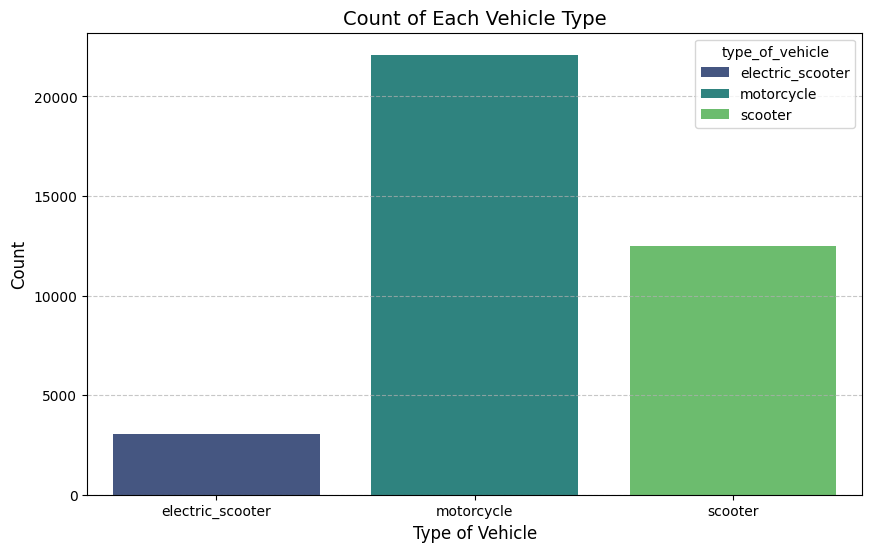

In [28]:
##### MOST VEHICLES USED 

#VISUALIZATION

# Grouping and counting vehicle types
vehicle_counts = df.groupby("type_of_vehicle", observed=False).size().sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, hue=vehicle_counts.index, palette="viridis", legend=True)

# Adding titles and labels
plt.title("Count of Each Vehicle Type", fontsize=14)
plt.xlabel("Type of Vehicle", fontsize=12)
plt.ylabel("Count", fontsize=12)
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

##### AVERAGE AGE OF THE DELIVERY PERSON

In [29]:
print(df["delivery_person_age"].mean().round(2))

29.62


##### OVERVIEW OF TIME TAKEN COLUMN

In [33]:
print("MEAN :" ,df["time_taken"].mean())

print("MAX :" ,df["time_taken"].max())

print("MIN :" ,df["time_taken"].min())

MEAN : 26.55126671451737
MAX : 54
MIN : 10


##### TOTAL ORDERS PER DELIVERY PERSON

In [34]:
deliveries_per_person= df.groupby("delivery_person_id")["order_id"].count().sort_values(ascending=False)
print(deliveries_per_person)

delivery_person_id
SURRES11DEL01       60
COIMBRES010DEL02    60
VADRES12DEL02       60
HYDRES13DEL02       58
RANCHIRES16DEL01    58
                    ..
AURGRES02DEL03       4
DEHRES13DEL02        4
AURGRES13DEL03       4
KOCRES16DEL03        4
BHPRES010DEL03       4
Name: order_id, Length: 1320, dtype: int64


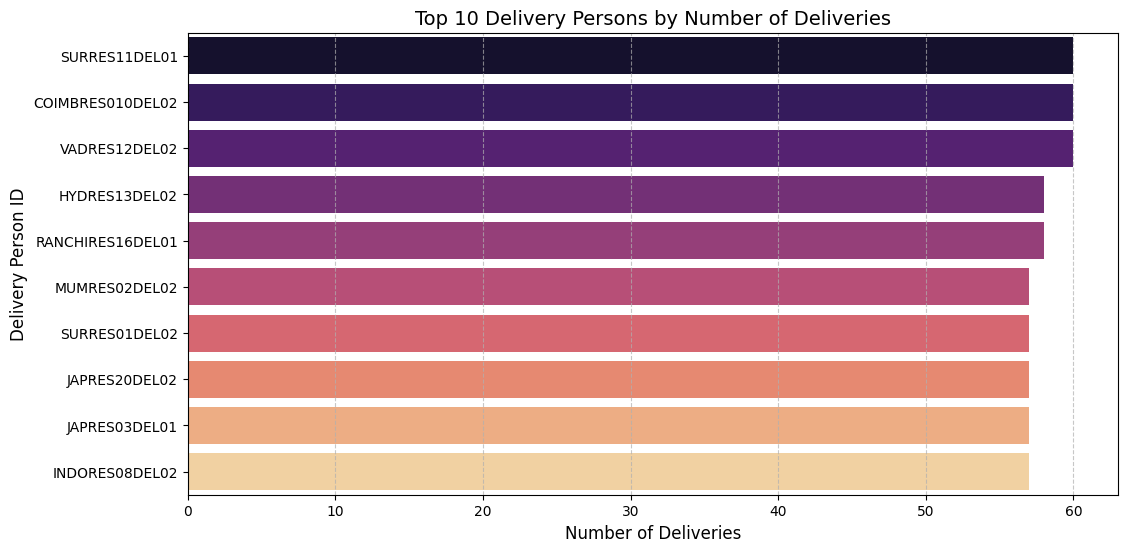

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and counting deliveries per person
deliveries_per_person = df.groupby("delivery_person_id")["order_id"].count().sort_values(ascending=False)

# Selecting top 20 delivery persons for better visualization
top_20 = deliveries_per_person.head(10)

# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_20.index, x=top_20.values, hue= top_20.index, palette="magma")

# Adding titles and labels
plt.title("Top 10 Delivery Persons by Number of Deliveries", fontsize=14)
plt.xlabel("Number of Deliveries", fontsize=12)
plt.ylabel("Delivery Person ID", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


##### TOTAL ORDERS by DELIVERY PERSON AGE

In [36]:
delivery_age_by_order = df.groupby("delivery_person_age")["order_id"].count().sort_values(ascending=False)
print(delivery_age_by_order)

delivery_person_age
35    1986
36    1970
37    1960
30    1948
38    1934
32    1920
34    1901
22    1886
39    1876
28    1872
33    1871
29    1851
31    1849
26    1845
21    1842
25    1838
24    1834
27    1832
20    1828
23    1774
Name: order_id, dtype: int64


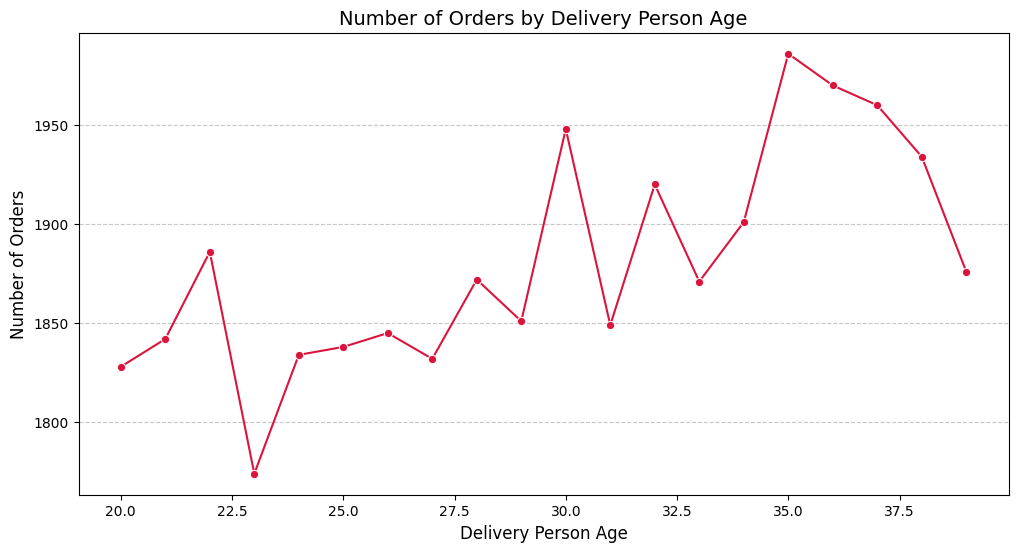

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and counting orders by delivery person age
delivery_age_by_order = df.groupby("delivery_person_age")["order_id"].count().sort_values(ascending=False)

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=delivery_age_by_order.index, y=delivery_age_by_order.values, marker='o', color='crimson')

# Adding titles and labels
plt.title("Number of Orders by Delivery Person Age", fontsize=14)
plt.xlabel("Delivery Person Age", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


##### ORDERS BY MONTH

In [38]:
print(df.groupby("order_month")["order_id"].count().sort_values(ascending= False))

order_month
3    26448
2     5956
4     5213
Name: order_id, dtype: int64


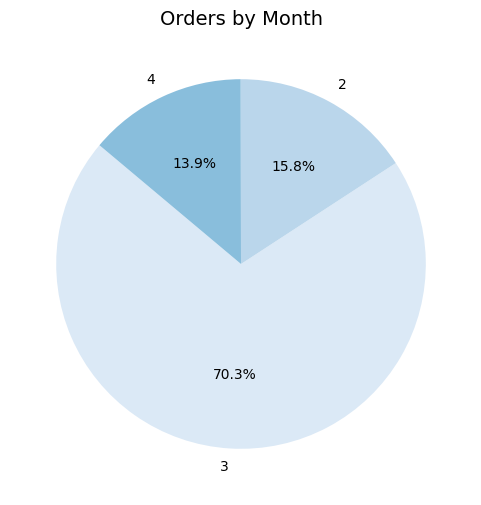

In [39]:
# Grouping and counting orders by month
orders_by_month = df.groupby("order_month")["order_id"].count().sort_values(ascending=False)

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(orders_by_month, labels=orders_by_month.index, autopct='%1.1f%%', colors=sns.color_palette("Blues"), startangle=140)
plt.title("Orders by Month", fontsize=14)
plt.show()

##### ORDERS BY DAY

In [40]:
print(df.groupby("order_day_name")["order_id"].count().sort_values(ascending= False))

order_day_name
Wednesday    5867
Friday       5772
Tuesday      5264
Thursday     5243
Saturday     5212
Sunday       5146
Monday       5113
Name: order_id, dtype: int64


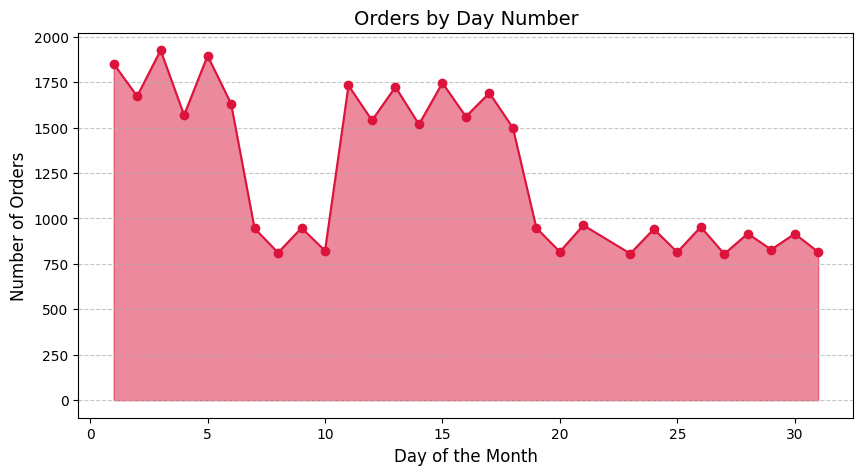

In [41]:
orders_by_day_num = df.groupby("order_day_num")["order_id"].count().sort_index()

# Creating an area plot
plt.figure(figsize=(10, 5))
plt.fill_between(orders_by_day_num.index, orders_by_day_num.values, color='crimson', alpha=0.5)
plt.plot(orders_by_day_num.index, orders_by_day_num.values, marker='o', color='crimson')
plt.title("Orders by Day Number", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ORDERS BY DATE

In [42]:
print(df.groupby("order_day_num")["order_id"].count().sort_index()) # to sort by order_day_num

order_day_num
1     1852
2     1673
3     1926
4     1569
5     1896
6     1632
7      946
8      812
9      948
10     823
11    1732
12    1540
13    1724
14    1518
15    1746
16    1561
17    1691
18    1499
19     948
20     817
21     963
23     807
24     942
25     815
26     954
27     805
28     917
29     829
30     916
31     816
Name: order_id, dtype: int64


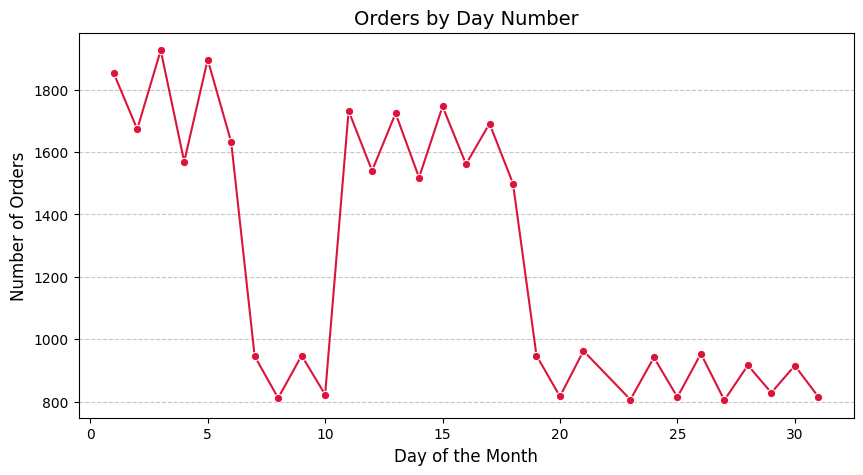

In [43]:
orders_by_day_num = df.groupby("order_day_num")["order_id"].count().sort_index()


plt.figure(figsize=(10, 5))
sns.lineplot(x=orders_by_day_num.index, y=orders_by_day_num.values, marker='o', color='crimson')
plt.title("Orders by Day Number", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ORDERS BY ORDER HOUR

In [44]:
print(df.groupby("time_orderd_hour")["order_id"].count().sort_values(ascending= False))

time_orderd_hour
21    4123
19    4013
17    3995
20    3949
18    3908
22    3881
23    3796
10    1703
8     1674
11    1660
9     1628
15     722
12     655
14     655
13     651
16     604
Name: order_id, dtype: int64


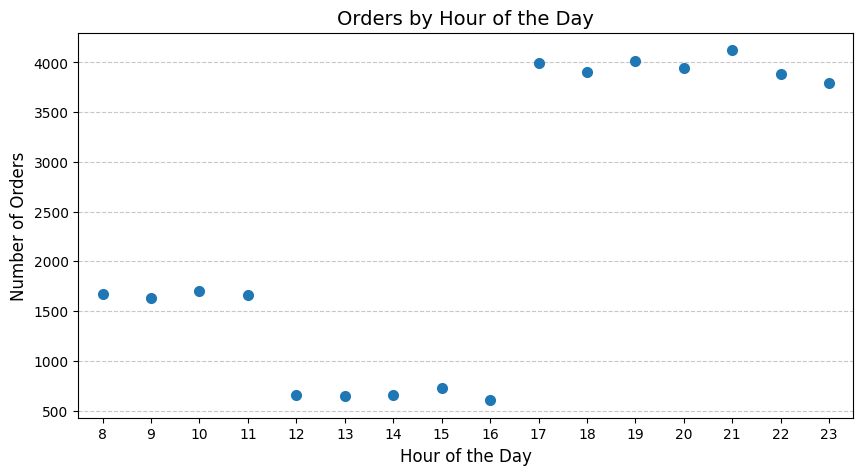

In [45]:
orders_by_hour = df.groupby("time_orderd_hour")["order_id"].count().sort_index()

# Creating a swarm plot
plt.figure(figsize=(10, 5))
sns.stripplot(x=orders_by_hour.index, y=orders_by_hour.values, jitter=True, size=8)
plt.title("Orders by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ORDER COUNT BY RESTAURANT LOCATION

In [46]:
order_count_by_restaurant=df.groupby(["restaurant_latitude", "restaurant_longitude"])["order_id"].count().sort_values(ascending=True)
print(order_count_by_restaurant)

restaurant_latitude  restaurant_longitude
-30.895817           75.813112                  1
-26.479108           80.315042                  1
-26.474986           80.342796                  1
-22.569367           88.433187                  1
-23.211529           77.419399                  1
                                             ... 
 26.914142           75.805704                149
 26.902328           75.794257                150
 26.888420           75.800689                150
 26.911378           75.789034                155
 0.000000            0.000000                3000
Name: order_id, Length: 483, dtype: int64


In [47]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
latitude = 26.911378
longitude = 75.789034

location = geolocator.reverse((latitude, longitude))
print(location.address)


Hasanpura-C, Jaipur, Jaipur Municipal Corporation, Jaipur Tehsil, Jaipur, Rajasthan, 302001, India


In [48]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
latitude = 23.214459
longitude = 77.434976

location = geolocator.reverse((latitude, longitude))
print(location.address)


Arera Colony, Bhopal, Huzur Tahsil, Bhopal, Madhya Pradesh, 462001, India


##### DELIVERY PERSON RATINGS

In [49]:
print(df["delivery_person_ratings"].agg(["min","max","mean"]))

min     2.500000
max     5.000000
mean    4.633054
Name: delivery_person_ratings, dtype: float64


##### DELIVERY PERSON RATING VS AVERAGE TIME TAKEN

In [50]:
print(df.groupby("delivery_person_ratings")["time_taken"].mean().round(2).sort_index(ascending= True))

delivery_person_ratings
2.5    37.17
2.6    38.71
2.7    36.05
2.8    36.81
2.9    38.59
3.0    32.80
3.1    36.64
3.2    36.41
3.3    36.35
3.4    35.93
3.5    37.09
3.6    37.28
3.7    37.46
3.8    37.15
3.9    37.59
4.0    34.90
4.1    34.64
4.2    34.57
4.3    34.60
4.4    35.06
4.5    23.79
4.6    24.78
4.7    24.45
4.8    24.30
4.9    24.36
5.0    25.81
Name: time_taken, dtype: float64


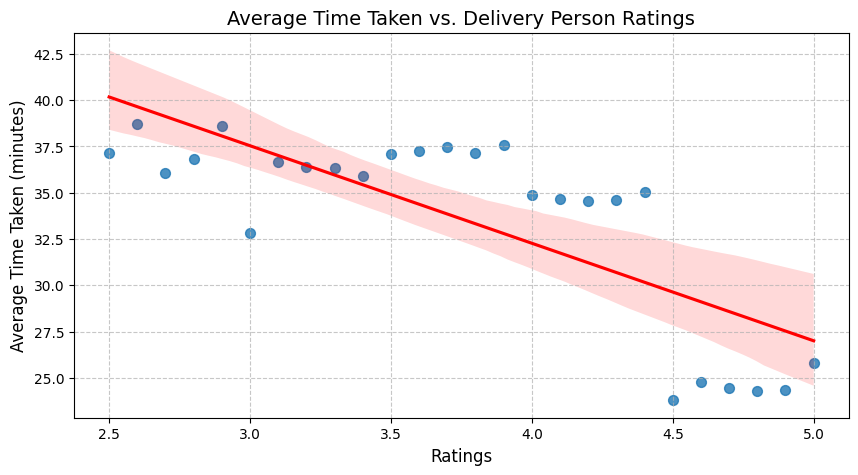

In [51]:
time_by_ratings = df.groupby("delivery_person_ratings")["time_taken"].mean().round(2).sort_index()

plt.figure(figsize=(10, 5))
sns.regplot(x=time_by_ratings.index, y=time_by_ratings.values, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title("Average Time Taken vs. Delivery Person Ratings", fontsize=14)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Average Time Taken (minutes)", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##### FESTIVAL VS  AVERAGE TIME TAKEN

In [52]:
print(df.groupby("festival",observed=False)["time_taken"].mean().round(2))

festival
No     26.16
Yes    45.49
Name: time_taken, dtype: float64


C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\1846661858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=time_by_festival.index, y=time_by_festival.values, palette="coolwarm")


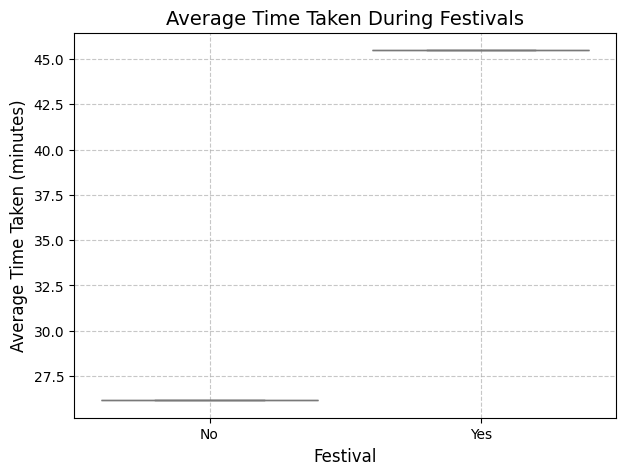

In [53]:
time_by_festival = df.groupby("festival", observed=False)["time_taken"].mean().round(2)

plt.figure(figsize=(7, 5))
sns.boxplot(x=time_by_festival.index, y=time_by_festival.values, palette="coolwarm")
plt.title("Average Time Taken During Festivals", fontsize=14)
plt.xlabel("Festival", fontsize=12)
plt.ylabel("Average Time Taken (minutes)", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##### Weather Condition VS  AVERAGE TIME TAKEN

In [54]:
print(df.groupby("weather_conditions",observed=False)["time_taken"].mean().round(2))

weather_conditions
Cloudy        29.09
Fog           29.17
Sandstorms    26.16
Stormy        26.14
Sunny         22.15
Windy         26.38
Name: time_taken, dtype: float64


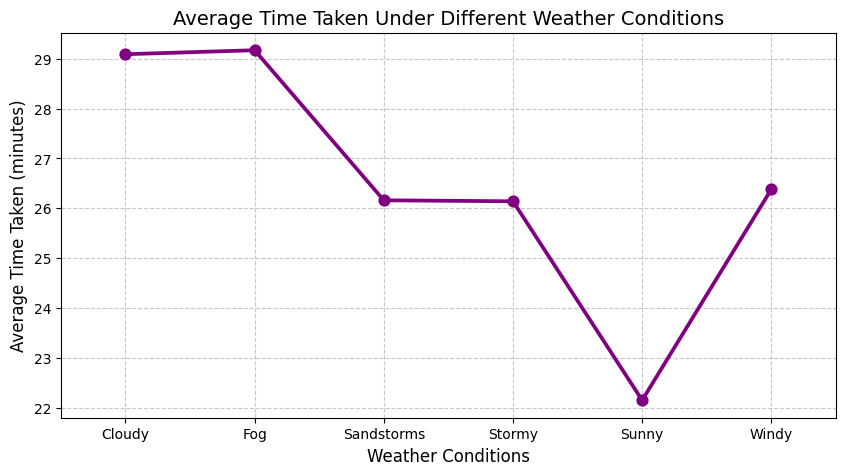

In [55]:
time_by_weather = df.groupby("weather_conditions", observed=False)["time_taken"].mean().round(2)

plt.figure(figsize=(10, 5))
sns.pointplot(x=time_by_weather.index, y=time_by_weather.values, color='purple', markers='o')
plt.title("Average Time Taken Under Different Weather Conditions", fontsize=14)
plt.xlabel("Weather Conditions", fontsize=12)
plt.ylabel("Average Time Taken (minutes)", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


##### Traffic Condition VS  AVERAGE TIME TAKEN

In [56]:
print(df.groupby("road_traffic_density",observed=False)["time_taken"].mean().round(2))

road_traffic_density
High      27.40
Jam       31.38
Low       21.50
Medium    26.91
Name: time_taken, dtype: float64


C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\1159519666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=time_by_traffic.index, y=time_by_traffic.values, palette="magma")


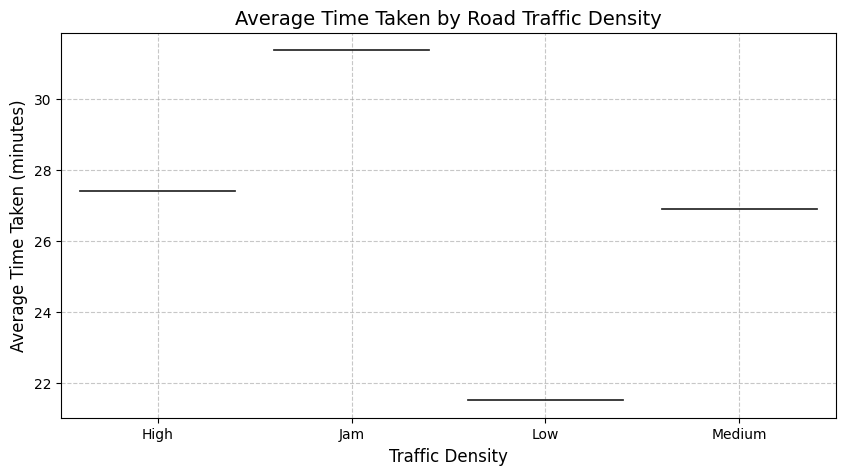

In [57]:
time_by_traffic = df.groupby("road_traffic_density", observed=False)["time_taken"].mean().round(2)

plt.figure(figsize=(10, 5))
sns.violinplot(x=time_by_traffic.index, y=time_by_traffic.values, palette="magma")
plt.title("Average Time Taken by Road Traffic Density", fontsize=14)
plt.xlabel("Traffic Density", fontsize=12)
plt.ylabel("Average Time Taken (minutes)", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##### CITY TYPE VS  AVERAGE TIME TAKEN

In [58]:
print(df.groupby("city",observed=False)["time_taken"].mean().round(2))

city
Metropolitian    27.44
Semi-Urban       49.66
Urban            23.18
Name: time_taken, dtype: float64


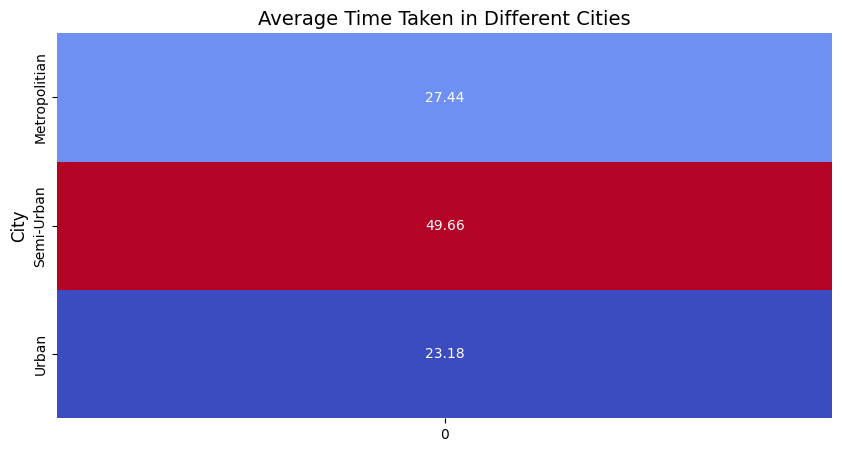

In [59]:
time_by_city = df.groupby("city", observed=False)["time_taken"].mean().round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(time_by_city.values.reshape(-1, 1), annot=True, fmt=".2f", cmap="coolwarm", cbar=False, yticklabels=time_by_city.index)
plt.title("Average Time Taken in Different Cities", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()

##### COUNT OF ORDERS VS WEATHER CONDITIONS

In [60]:
print(df.groupby("weather_conditions",observed=False)["order_id"].count().sort_values(ascending=False))

weather_conditions
Fog           6434
Stormy        6352
Cloudy        6288
Sandstorms    6258
Windy         6233
Sunny         6052
Name: order_id, dtype: int64


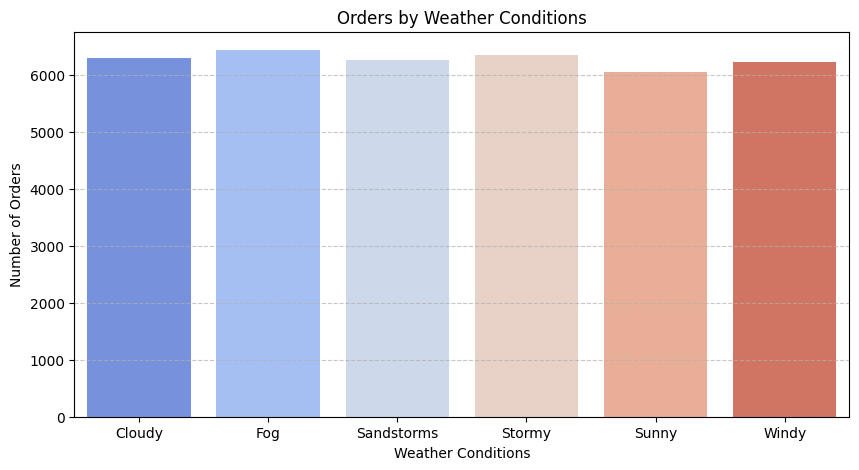

In [61]:
orders_by_weather = df.groupby("weather_conditions", observed=False)["order_id"].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_by_weather.index, y=orders_by_weather.values, hue=orders_by_weather.index,palette="coolwarm")
plt.title("Orders by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### MULTIPLE DELIVERIES VS AVERAGE TIME TAKEN

In [62]:
print(df.groupby("multiple_deliveries",observed=False)["time_taken"].mean().round(2).sort_index(ascending=True))

multiple_deliveries
0    23.10
1    26.99
2    40.44
3    47.88
Name: time_taken, dtype: float64


C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\3256478621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["multiple_deliveries"], y=df["time_taken"], palette="magma")


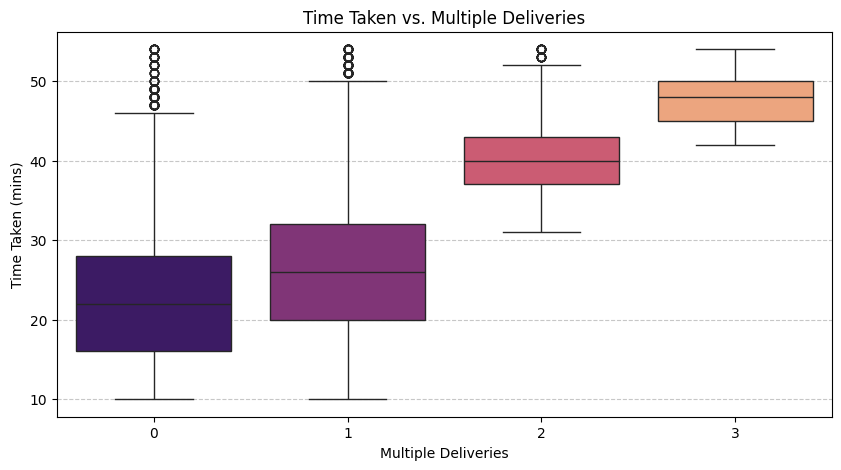

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["multiple_deliveries"], y=df["time_taken"], palette="magma")
plt.title("Time Taken vs. Multiple Deliveries")
plt.xlabel("Multiple Deliveries")
plt.ylabel("Time Taken (mins)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### VEHICLE TYPE VS AVERAGE TIME TAKEN

In [64]:
print(df.groupby("type_of_vehicle",observed=False)["time_taken"].mean().round(2).sort_index(ascending=True))

type_of_vehicle
electric_scooter    24.53
motorcycle          27.84
scooter             24.76
Name: time_taken, dtype: float64


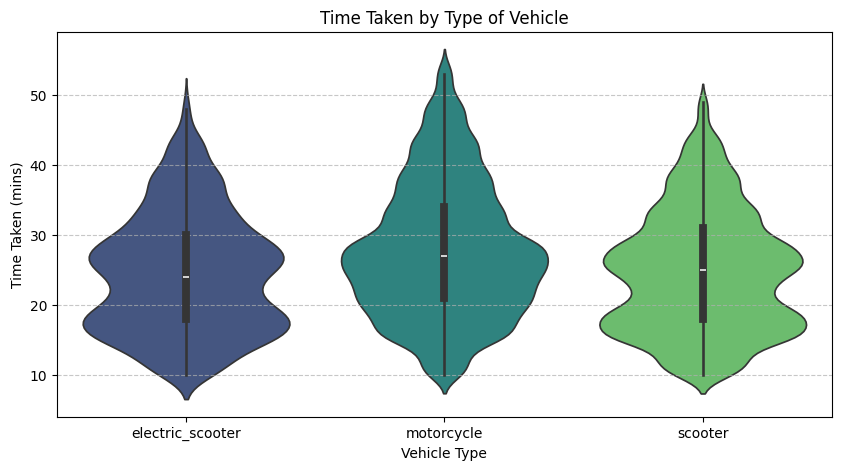

In [65]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["type_of_vehicle"], hue=df["type_of_vehicle"], y=df["time_taken"], palette="viridis")
plt.title("Time Taken by Type of Vehicle")
plt.xlabel("Vehicle Type")
plt.ylabel("Time Taken (mins)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### COUNT OF ORDERS BY FESTIVAL

In [66]:
print(df.groupby("festival",observed=False)["order_id"].count())

festival
No     36856
Yes      761
Name: order_id, dtype: int64


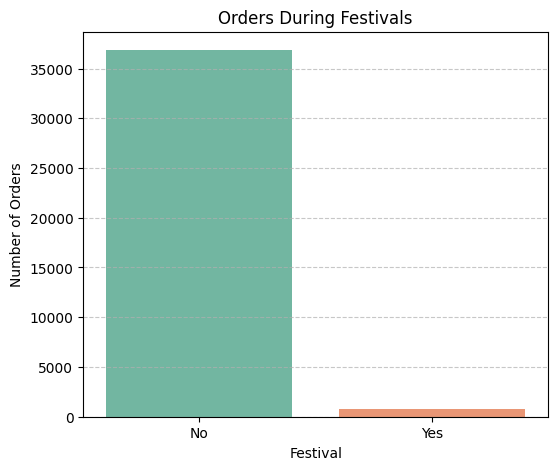

In [67]:
orders_by_festival = df.groupby("festival", observed=False)["order_id"].count()
plt.figure(figsize=(6, 5))
sns.barplot(x=orders_by_festival.index, y=orders_by_festival.values, hue=orders_by_festival.index,palette="Set2")
plt.title("Orders During Festivals")
plt.xlabel("Festival")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### DELIVERY RATINGS BY TRAFFIC

In [68]:
print(df.groupby("road_traffic_density",observed=False)["delivery_person_ratings"].mean().round(2).sort_index(ascending=True))

road_traffic_density
High      4.65
Jam       4.59
Low       4.64
Medium    4.66
Name: delivery_person_ratings, dtype: float64


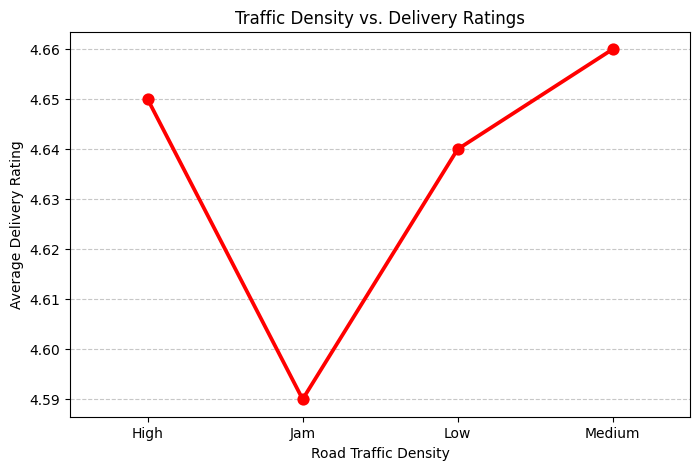

In [69]:
traffic_vs_ratings = df.groupby("road_traffic_density", observed=False)["delivery_person_ratings"].mean().round(2).sort_index()
plt.figure(figsize=(8, 5))
sns.pointplot(x=traffic_vs_ratings.index, y=traffic_vs_ratings.values, color="red", markers="o")
plt.title("Traffic Density vs. Delivery Ratings")
plt.xlabel("Road Traffic Density")
plt.ylabel("Average Delivery Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ORDER QUANTITY VS ORDER TYPE

In [70]:
print(df.groupby("type_of_order",observed=False)["order_id"].count().sort_values(ascending=True))

type_of_order
Buffet    9271
Drinks    9399
Meal      9456
Snack     9491
Name: order_id, dtype: int64


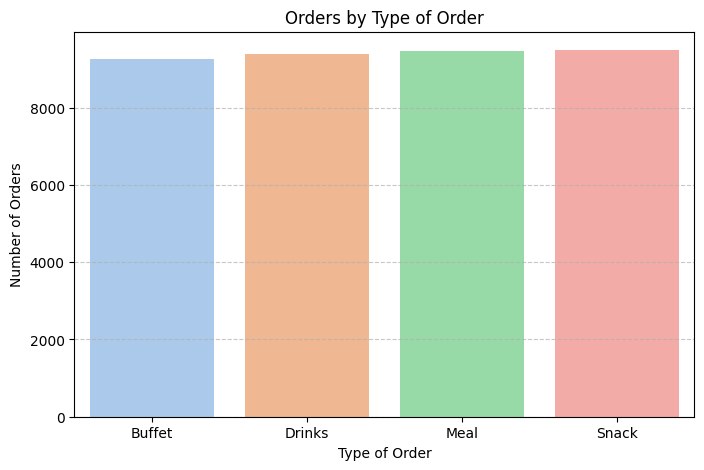

In [71]:
orders_by_type = df.groupby("type_of_order", observed=False)["order_id"].count().sort_values(ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=orders_by_type.index, y=orders_by_type.values, hue=orders_by_type.index,palette="pastel")
plt.title("Orders by Type of Order")
plt.xlabel("Type of Order")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Multiple ORDER QUANTITY VS ORDER TYPE

In [72]:
print(df.groupby(["type_of_order","festival"] , observed=False)["multiple_deliveries"].sum().sort_values(ascending=True))

type_of_order  festival
Meal           Yes          232
Buffet         Yes          235
Drinks         Yes          253
Snack          Yes          284
Buffet         No          6655
Snack          No          6739
Drinks         No          6850
Meal           No          6880
Name: multiple_deliveries, dtype: int64


<Figure size 1200x600 with 0 Axes>

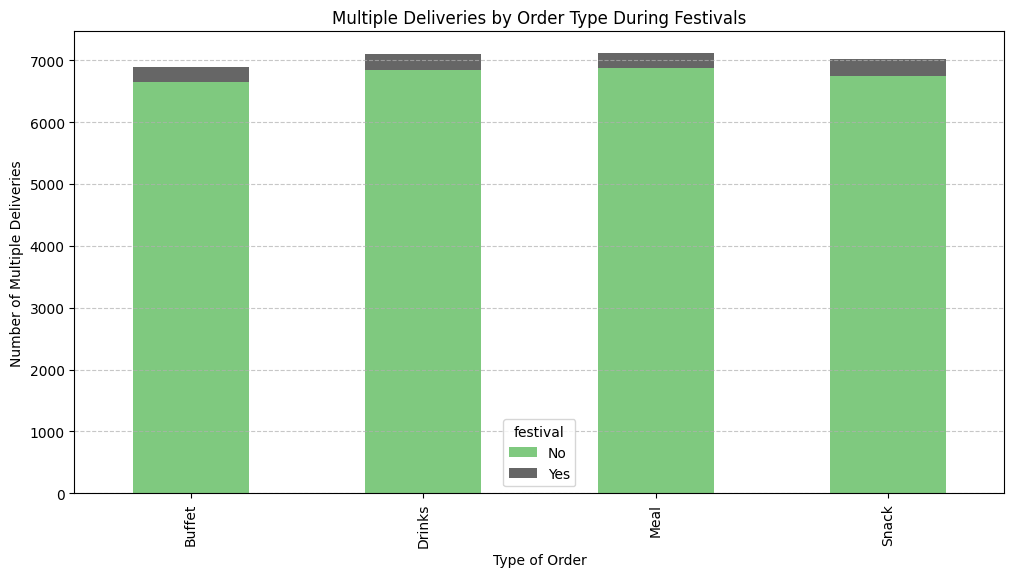

In [73]:
plt.figure(figsize=(12, 6))
festival_deliveries = df.groupby(["type_of_order", "festival"], observed=False)["multiple_deliveries"].sum().sort_values(ascending=True)
festival_deliveries.unstack().plot(kind='bar', stacked=True, colormap="Accent", figsize=(12, 6))
plt.title("Multiple Deliveries by Order Type During Festivals")
plt.xlabel("Type of Order")
plt.ylabel("Number of Multiple Deliveries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### WEATHER CONDITION VS MONTH

In [74]:
print(df.groupby("weather_conditions",observed=False)["time_orderd_hour"].mean().sort_values(ascending=False))

weather_conditions
Cloudy        17.691635
Windy         17.629552
Sunny         17.582948
Fog           17.572894
Sandstorms    17.566155
Stormy        17.560611
Name: time_orderd_hour, dtype: float64


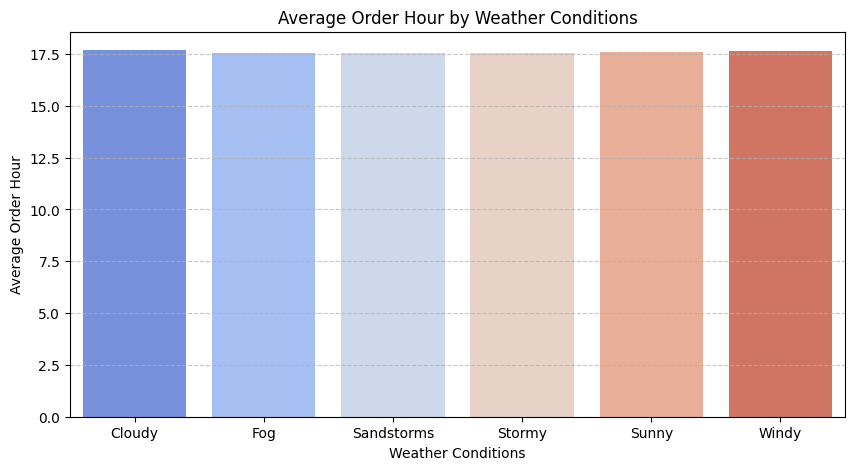

In [75]:
weather_order_hour = df.groupby("weather_conditions", observed=False)["time_orderd_hour"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_order_hour.index, y=weather_order_hour.values,hue=weather_order_hour.index ,palette="coolwarm")
plt.title("Average Order Hour by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Average Order Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### VEHICLE CONDITION VS TIME TAKEN VS FESTIVAL

In [76]:
print(df.groupby(["vehicle_condition","festival"],observed=False)["time_taken"].mean().round(2).sort_index(ascending=True))

vehicle_condition  festival
0                  No          29.56
                   Yes         46.51
1                  No          24.47
                   Yes         43.12
2                  No          24.51
                   Yes         43.58
Name: time_taken, dtype: float64


<Figure size 1200x600 with 0 Axes>

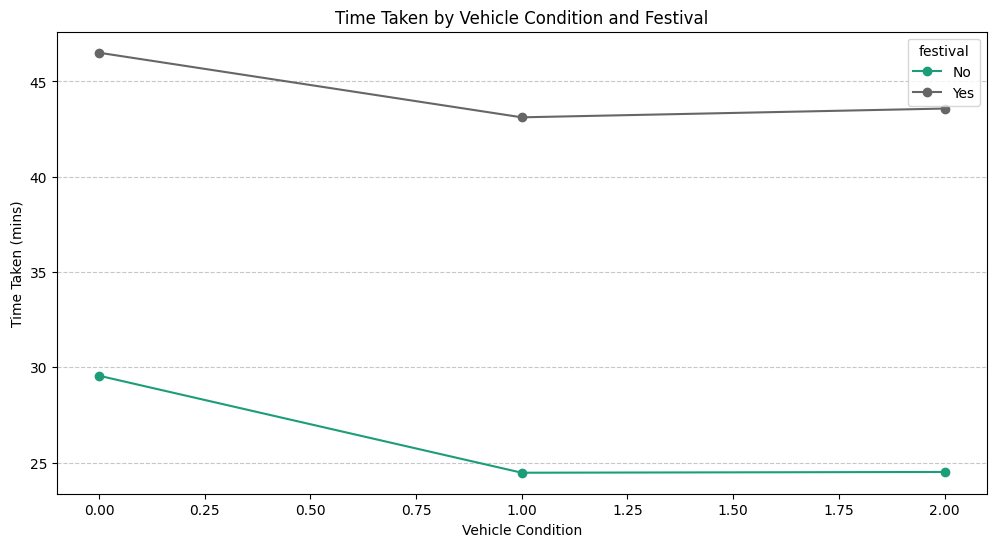

In [77]:
plt.figure(figsize=(12, 6))
time_vs_condition_festival = df.groupby(["vehicle_condition", "festival"], observed=False)["time_taken"].mean().round(2).unstack()
time_vs_condition_festival.plot(kind='line', marker='o', figsize=(12, 6), colormap='Dark2')
plt.title("Time Taken by Vehicle Condition and Festival")
plt.xlabel("Vehicle Condition")
plt.ylabel("Time Taken (mins)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#####  MOST USED VEHICLES DURING FESTIVAL

In [78]:
df[df["festival"]=="Yes"].groupby(["festival","type_of_vehicle"], observed= False)["type_of_vehicle"].count().nlargest(2)

festival  type_of_vehicle
Yes       motorcycle         601
          scooter            135
Name: type_of_vehicle, dtype: int64

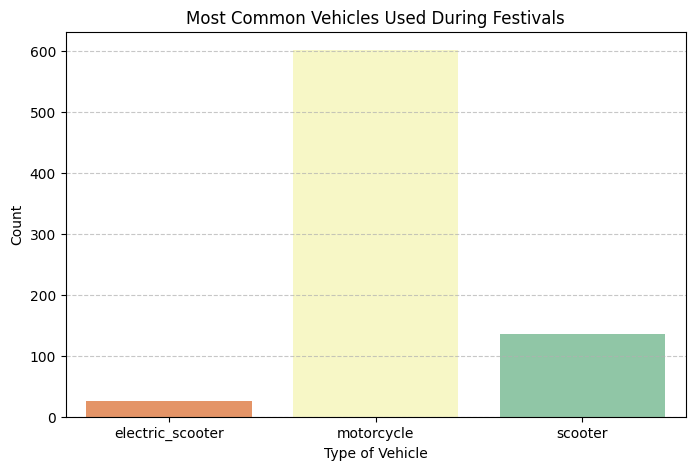

In [79]:
festival_vehicle_counts = df[df["festival"]=="Yes"].groupby(["festival", "type_of_vehicle"], observed=False)["type_of_vehicle"].count().nlargest(3)
plt.figure(figsize=(8, 5))
sns.barplot(x=festival_vehicle_counts.index.get_level_values(1), y=festival_vehicle_counts.values, hue= festival_vehicle_counts.index.get_level_values(1),palette="Spectral")
plt.title("Most Common Vehicles Used During Festivals")
plt.xlabel("Type of Vehicle")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### DELIVERY LOCATION WITH MOST ORDERS

In [80]:
df.groupby(["delivery_location_latitude","delivery_location_longitude"])["order_id"].count().nlargest(20)

delivery_location_latitude  delivery_location_longitude
0.130000                    0.130000                       286
0.070000                    0.070000                       280
0.090000                    0.090000                       279
0.020000                    0.020000                       278
0.040000                    0.040000                       277
0.010000                    0.010000                       271
0.060000                    0.060000                       271
0.110000                    0.110000                       271
0.080000                    0.080000                       270
0.050000                    0.050000                       261
0.030000                    0.030000                       256
18.644080                   74.008520                       18
12.363225                   76.670028                       17
13.046047                   80.278114                       17
13.121878                   80.288519                       17

In [81]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
latitude = 31.054057 
longitude = 75.979820

location = geolocator.reverse((latitude, longitude))
print(location.address)


ODR05, Nagar, Nawanshahr Tahsil, Shaheed Bhagat Singh Nagar, Punjab, 144419, India


In [82]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
latitude =12.35850
longitude = 76.715808 

location = geolocator.reverse((latitude, longitude))
print(location.address)


Kalisiddana Hundi, Srirangapattana taluk, Mandya, Karnataka, 570020, India


##### OVERVIEW OF MOST SELLING RESTAURANTS BY FOOD CATEGORY

In [83]:
df.groupby(["restaurant_latitude","restaurant_longitude","type_of_order"])["order_id"].count().sort_values(ascending=False)

C:\Users\RUBAN\AppData\Local\Temp\ipykernel_620\42386414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["restaurant_latitude","restaurant_longitude","type_of_order"])["order_id"].count().sort_values(ascending=False)


restaurant_latitude  restaurant_longitude  type_of_order
0.000000             0.000000              Meal             770
                                           Snack            764
                                           Buffet           749
                                           Drinks           717
26.956431            75.776649             Snack             48
                                                           ... 
30.914057            88.393294             Snack              0
                     88.393310             Buffet             0
                                           Drinks             0
                                           Meal               0
                                           Snack              0
Name: order_id, Length: 751548, dtype: int64

In [84]:
print(df[df["type_of_order"]=="Snack"].groupby(["restaurant_latitude","restaurant_longitude"])["order_id"].count().sort_values(ascending=False))

restaurant_latitude  restaurant_longitude
 0.000000            0.000000                764
 26.956431           75.776649                48
 26.892312           75.806896                47
 12.323225           76.630028                47
 18.994049           72.825203                45
                                            ... 
-15.496162           73.825364                 1
-15.498603           73.826911                 1
-15.546594           73.760431                 1
-19.875016           75.322405                 1
-19.876106           75.340775                 1
Name: order_id, Length: 415, dtype: int64


In [85]:
print(df[df["type_of_order"]=="Buffet"].groupby(["restaurant_latitude","restaurant_longitude"])["order_id"].count().sort_values(ascending=False))

restaurant_latitude  restaurant_longitude
 0.000000            0.000000                749
 17.431477           78.400350                45
 23.357804           85.325146                44
 22.732225           75.874765                44
 22.725748           75.898497                44
                                            ... 
-19.878028           75.317475                 1
-9.959778            76.296106                 1
-10.035573           76.336958                 1
-15.157944           73.950889                 1
-15.569600           73.742294                 1
Name: order_id, Length: 421, dtype: int64


In [86]:
print(df[df["type_of_order"]=="Meal"].groupby(["restaurant_latitude","restaurant_longitude"])["order_id"].count().sort_values(ascending=False))

restaurant_latitude  restaurant_longitude
 0.000000            0.000000                770
 12.933284           77.615428                46
 26.911378           75.789034                45
 26.902908           75.792934                44
 17.433809           78.386744                44
                                            ... 
-10.020683           76.310631                 1
-9.988483            76.295211                 1
-10.027014           76.308053                 1
-15.303897           73.914336                 1
-15.561295           73.749478                 1
Name: order_id, Length: 423, dtype: int64


In [87]:
print(df[df["type_of_order"]=="Drinks"].groupby(["restaurant_latitude","restaurant_longitude"])["order_id"].count().sort_values(ascending=False))

restaurant_latitude  restaurant_longitude
 0.000000            0.000000                717
 26.914142           75.805704                47
 10.994136           76.963303                46
 26.891191           75.802083                45
 26.902908           75.792934                45
                                            ... 
-19.876428           75.364792                 1
-9.970717            76.285447                 1
-10.028047           76.310019                 1
-10.027014           76.308053                 1
-9.982834            76.283268                 1
Name: order_id, Length: 420, dtype: int64


# Pickup Duration Analysis

In [88]:
print(df.groupby(["city", "festival"],observed=False)["pickup_duration"].mean().round(2))

city           festival
Metropolitian  No           87.10
               Yes          67.66
Semi-Urban     No           64.04
               Yes          10.83
Urban          No           86.27
               Yes         129.39
Name: pickup_duration, dtype: float64


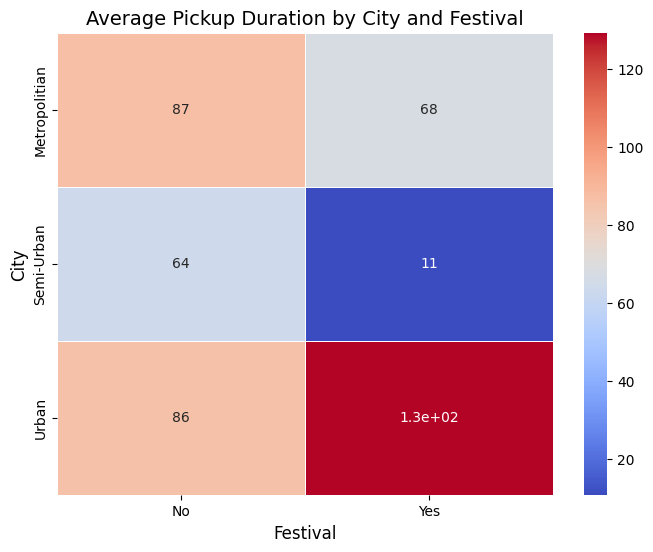

In [89]:
city_festival_pickup = df.groupby(["city", "festival"], observed=False)["pickup_duration"].mean().round(2).unstack()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(city_festival_pickup, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Average Pickup Duration by City and Festival", fontsize=14)
plt.xlabel("Festival", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()


In [90]:
print(df.groupby(["weather_conditions", "road_traffic_density"],observed=False)["pickup_duration"].mean().round(2))

weather_conditions  road_traffic_density
Cloudy              High                     97.61
                    Jam                      77.58
                    Low                      86.11
                    Medium                   98.56
Fog                 High                    108.15
                    Jam                      69.37
                    Low                      96.31
                    Medium                   86.56
Sandstorms          High                    103.53
                    Jam                      68.40
                    Low                      95.68
                    Medium                   98.91
Stormy              High                    112.62
                    Jam                      62.17
                    Low                      84.85
                    Medium                   97.89
Sunny               High                     93.80
                    Jam                      69.81
                    Low                  

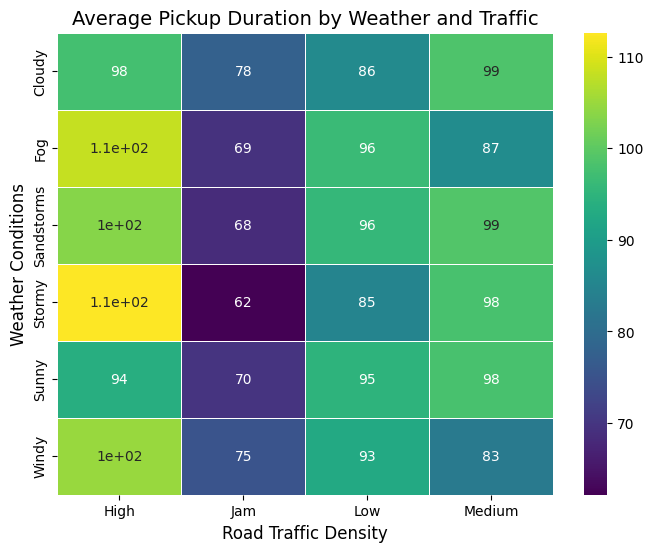

In [91]:
weather_traffic_pickup = df.groupby(["weather_conditions", "road_traffic_density"], observed=False)["pickup_duration"].mean().round(2).unstack()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(weather_traffic_pickup, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Average Pickup Duration by Weather and Traffic", fontsize=14)
plt.xlabel("Road Traffic Density", fontsize=12)
plt.ylabel("Weather Conditions", fontsize=12)
plt.show()

In [92]:
print(df.groupby(["type_of_vehicle"],observed=False)["pickup_duration"].mean().round(2))

type_of_vehicle
electric_scooter    86.17
motorcycle          85.46
scooter             88.62
Name: pickup_duration, dtype: float64


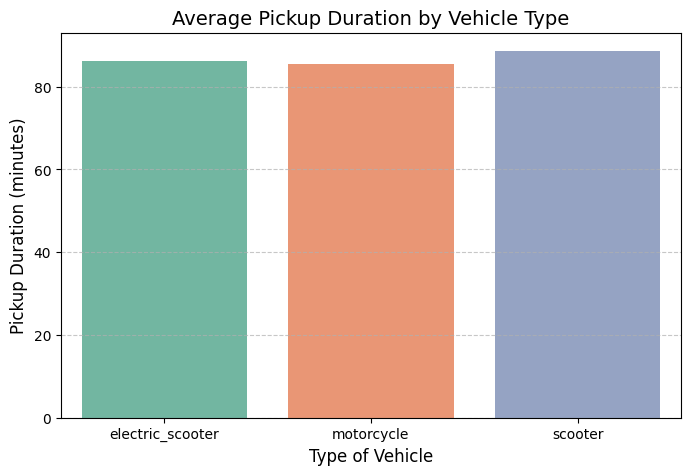

In [93]:
vehicle_pickup = df.groupby("type_of_vehicle", observed=False)["pickup_duration"].mean().round(2)

plt.figure(figsize=(8, 5))
sns.barplot(x=vehicle_pickup.index, y=vehicle_pickup.values,hue=vehicle_pickup.index, palette="Set2")
plt.title("Average Pickup Duration by Vehicle Type", fontsize=14)
plt.xlabel("Type of Vehicle", fontsize=12)
plt.ylabel("Pickup Duration (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


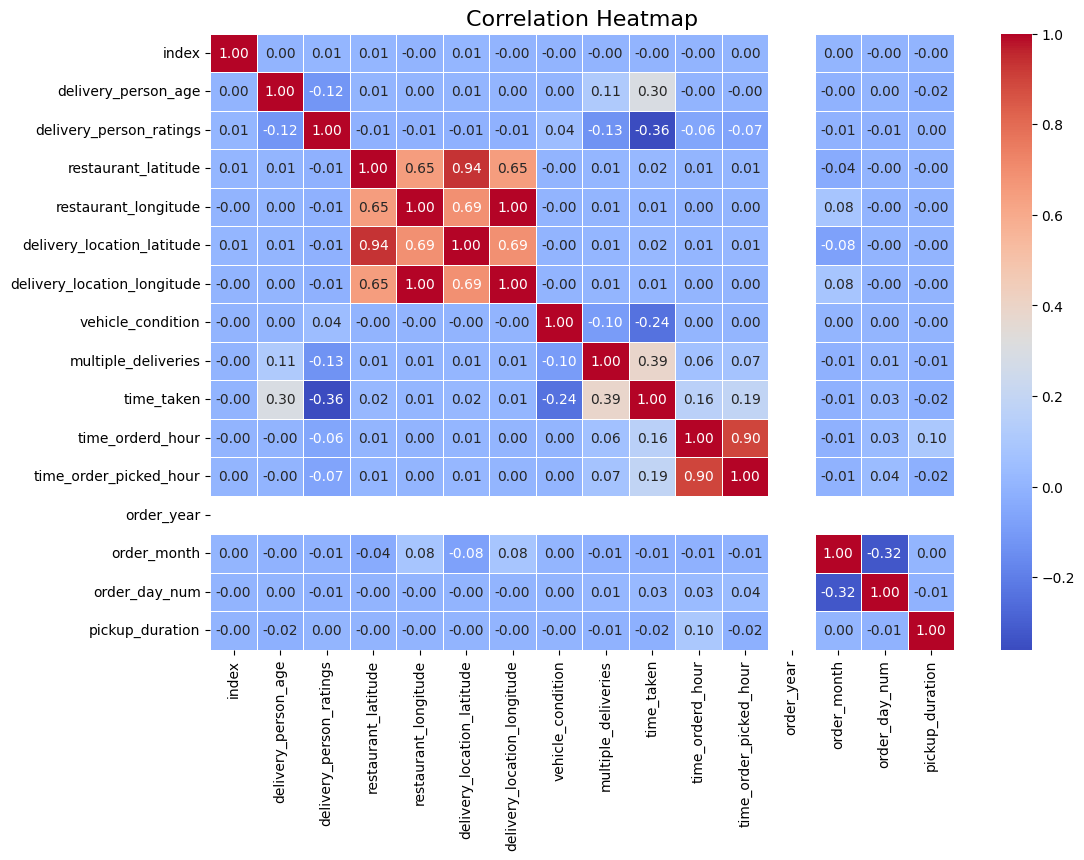

In [94]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [95]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()


In [96]:
corr_matrix

,index,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,vehicle_condition,multiple_deliveries,time_taken,time_orderd_hour,time_order_picked_hour,order_year,order_month,order_day_num,pickup_duration
index,1.000000,0.001090,0.006556,0.007949,-0.001370,0.006489,-0.001361,-0.002975,-0.004060,-0.003933,-0.001029,0.002542,NaN,0.001685,-0.000192,-0.002238
delivery_person_age,0.001090,1.000000,-0.117004,0.005087,0.003352,0.006043,0.003348,0.001928,0.114581,0.297687,-0.001358,-0.000019,NaN,-0.004499,0.003296,-0.017870
delivery_person_ratings,0.006556,-0.117004,1.000000,-0.011728,-0.013448,-0.013466,-0.013638,0.041904,-0.127099,-0.360189,-0.060151,-0.065451,NaN,-0.006656,-0.007044,0.002122
restaurant_latitude,0.007949,0.005087,-0.011728,1.000000,0.649121,0.935020,0.649174,-0.003425,0.011288,0.018096,0.006146,0.008019,NaN,-0.037149,-0.001769,-0.000492
restaurant_longitude,-0.001370,0.003352,-0.013448,0.649121,1.000000,0.690468,0.999998,-0.001829,0.005332,0.011151,0.000191,0.002116,NaN,0.084875,-0.003392,-0.001937
delivery_location_latitude,0.006489,0.006043,-0.013466,0.935020,0.690468,1.000000,0.690532,-0.001557,0.011666,0.017533,0.008936,0.012952,NaN,-0.077989,-0.000557,-0.001638
delivery_location_longitude,-0.001361,0.003348,-0.013638,0.649174,0.999998,0.690532,1.000000,-0.001817,0.005547,0.011710,0.001183,0.003200,NaN,0.084841,-0.003296,-0.001964
vehicle_condition,-0.002975,0.001928,0.041904,-0.003425,-0.001829,-0.001557,-0.001817,1.000000,-0.098737,-0.243173,0.002031,0.004755,NaN,0.001306,0.001148,-0.000484
multiple_deliveries,-0.004060,0.114581,-0.127099,0.011288,0.005332,0.011666,0.005547,-0.098737,1.000000,0.385495,0.060193,0.071462,NaN,-0.011023,0.014259,-0.005763
time_taken,-0.003933,0.297687,-0.360189,0.018096,0.011151,0.017533,0.011710,-0.243173,0.385495,1.000000,0.157936,0.189416,NaN,-0.011207,0.026748,-0.018942
